In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [29]:
def create_data():
    X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)
    return X, y_true

In [30]:
def run_dbscan(X, eps=0.3, min_samples=10):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    return labels, core_samples_mask

In [31]:
def plot_clusters(X, labels, core_samples_mask):
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

    colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(8, 6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = (0, 0, 0, 1)  # Black for noise

        class_member_mask = (labels == k)

        # Core points
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=8,
                 label=f'Cluster {k}' if k != -1 else 'Noise')

        # Border points
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=4)

    plt.title(f'DBSCAN Clustering: {n_clusters} clusters (Noise in black)')
    plt.legend()
    plt.show()

In [32]:
def evaluate_clustering(X, labels, y_true):
    # Noise points are labeled -1; silhouette score ignores them
    mask = labels != -1
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        silhouette = silhouette_score(X[mask], labels[mask])
        print(f"Silhouette Score: {silhouette:.3f}  ➝  {'Good' if silhouette > 0.5 else 'Poor'} clustering quality")
    else:
        print("Silhouette Score: Cannot compute (less than 2 clusters detected)")

    ari = adjusted_rand_score(y_true, labels)
    print(f"Adjusted Rand Index (ARI): {ari:.3f}")
    if ari > 0.9:
        print("ARI ➝ Excellent cluster recovery")
    elif ari > 0.8:
        print("ARI ➝ Good recovery")
    elif ari > 0.5:
        print("ARI ➝ Moderate recovery")
    else:
        print("ARI ➝ Poor recovery")

    # Additional info
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {(labels == -1).sum()}")

/tmp/ipython-input-31-3703210983.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(unique_labels)))


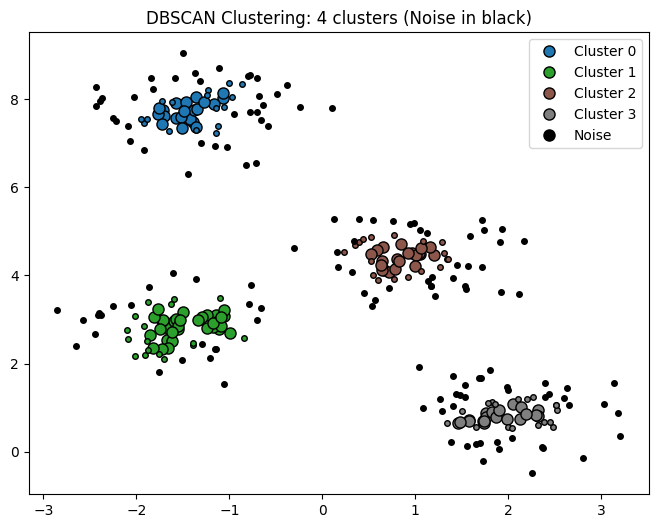

Silhouette Score: 0.832  ➝  Good clustering quality
Adjusted Rand Index (ARI): 0.307
ARI ➝ Poor recovery
Number of clusters: 4
Number of noise points: 133


In [33]:
X, y_true = create_data()
labels, core_samples_mask = run_dbscan(X, eps=0.3, min_samples=10)

plot_clusters(X, labels, core_samples_mask)
evaluate_clustering(X, labels, y_true)

Silhouette's score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.


Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery and above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery.